##### Metrics for Classification Sticth Fabric Detection
- Accuracy (Most Important)
- F1 Score 
- Precision
- Recall
- Time Complexity (Important)
- ROC AUC (Optional)
- Kappa (Optional)
- MCC (Optional)

### Calculation Metrics

- **Confusion Matrix**: Defined as TP (True Positive), FP (False Positive), FN (False Negative), TN (True Negative)

- **Accuracy**: `(TP + TN) / (TP + TN + FN + FP)`

- **Error Rate**: `(FP + FN) / (TP + TN + FN + FP)`

- **Sensitivity (Recall)**: `TP / (TP + FN)`

- **Specificity**: `TN / (TN + FP)`

- **Balanced Accuracy**: `(Sensitivity + Specificity) / 2`

- **Precision**: `TP / (TP + FP)`

- **F1-Score**: `2 * (Precision * Recall) / (Precision + Recall)`

- **Macro**: A type of averaging method for multiclass classification

- **Weighted**: A type of averaging method that takes class imbalance into account

- **ROC AUC**: Area Under the Receiver Operating Characteristic Curve

- **PR AUC**: Area Under the Precision-Recall Curve

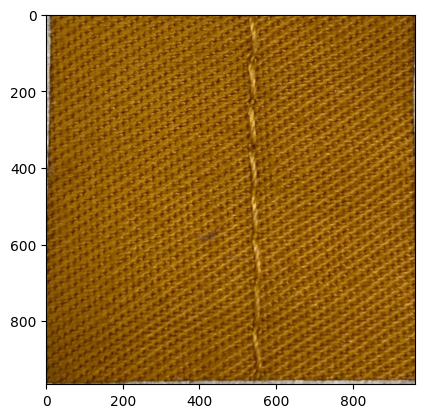

In [486]:
import cv2 												# OpenCV (Requirement For Image Processing)
import numpy as np									# Numpy (Requirement For Special Math Operations Like Matrix Multiplication)
import matplotlib.pyplot as plt					# Matplotlib (Requirement For Plotting Graphs Or Evaluate The Result)
import warnings
warnings.filterwarnings('ignore')					# Ignore Warnings

path = 'dataset/train/straight/straight31.jpg' 		# Path to the image

image = cv2.imread(path)							# Load the image based on the path

if image is None:
    print("Failed to load image")   
else:
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)			# Convert the image to RGB (OpenCV uses BGR)

	plt.imshow(image)									# Display the image

The resolution of the image is 964x965 pixels.


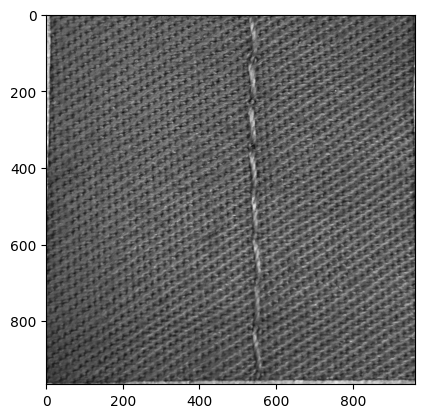

In [487]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)          # Load image in grayscale

if image is None:
    print("Failed to load image")   
else:
    height, width = image.shape[:2] # Get the image resolution (height, width) In Pixels
    print(f'The resolution of the image is {width}x{height} pixels.')
    plt.imshow(image, cmap='gray')  # Display the image in grayscale cmap is use because matplotlib uses RGB and OpenCV uses BGR

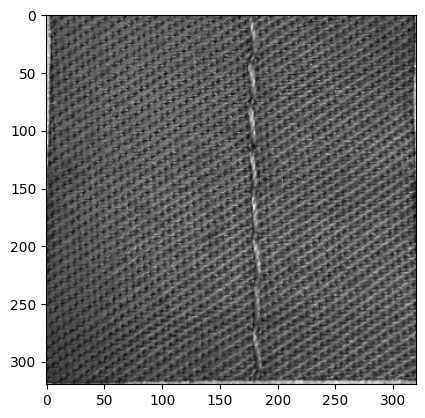

In [488]:
# Resize the image into 320x320 pixels
image = cv2.resize(image, (320, 320))

# Display the resized image
plt.imshow(image, cmap='gray')

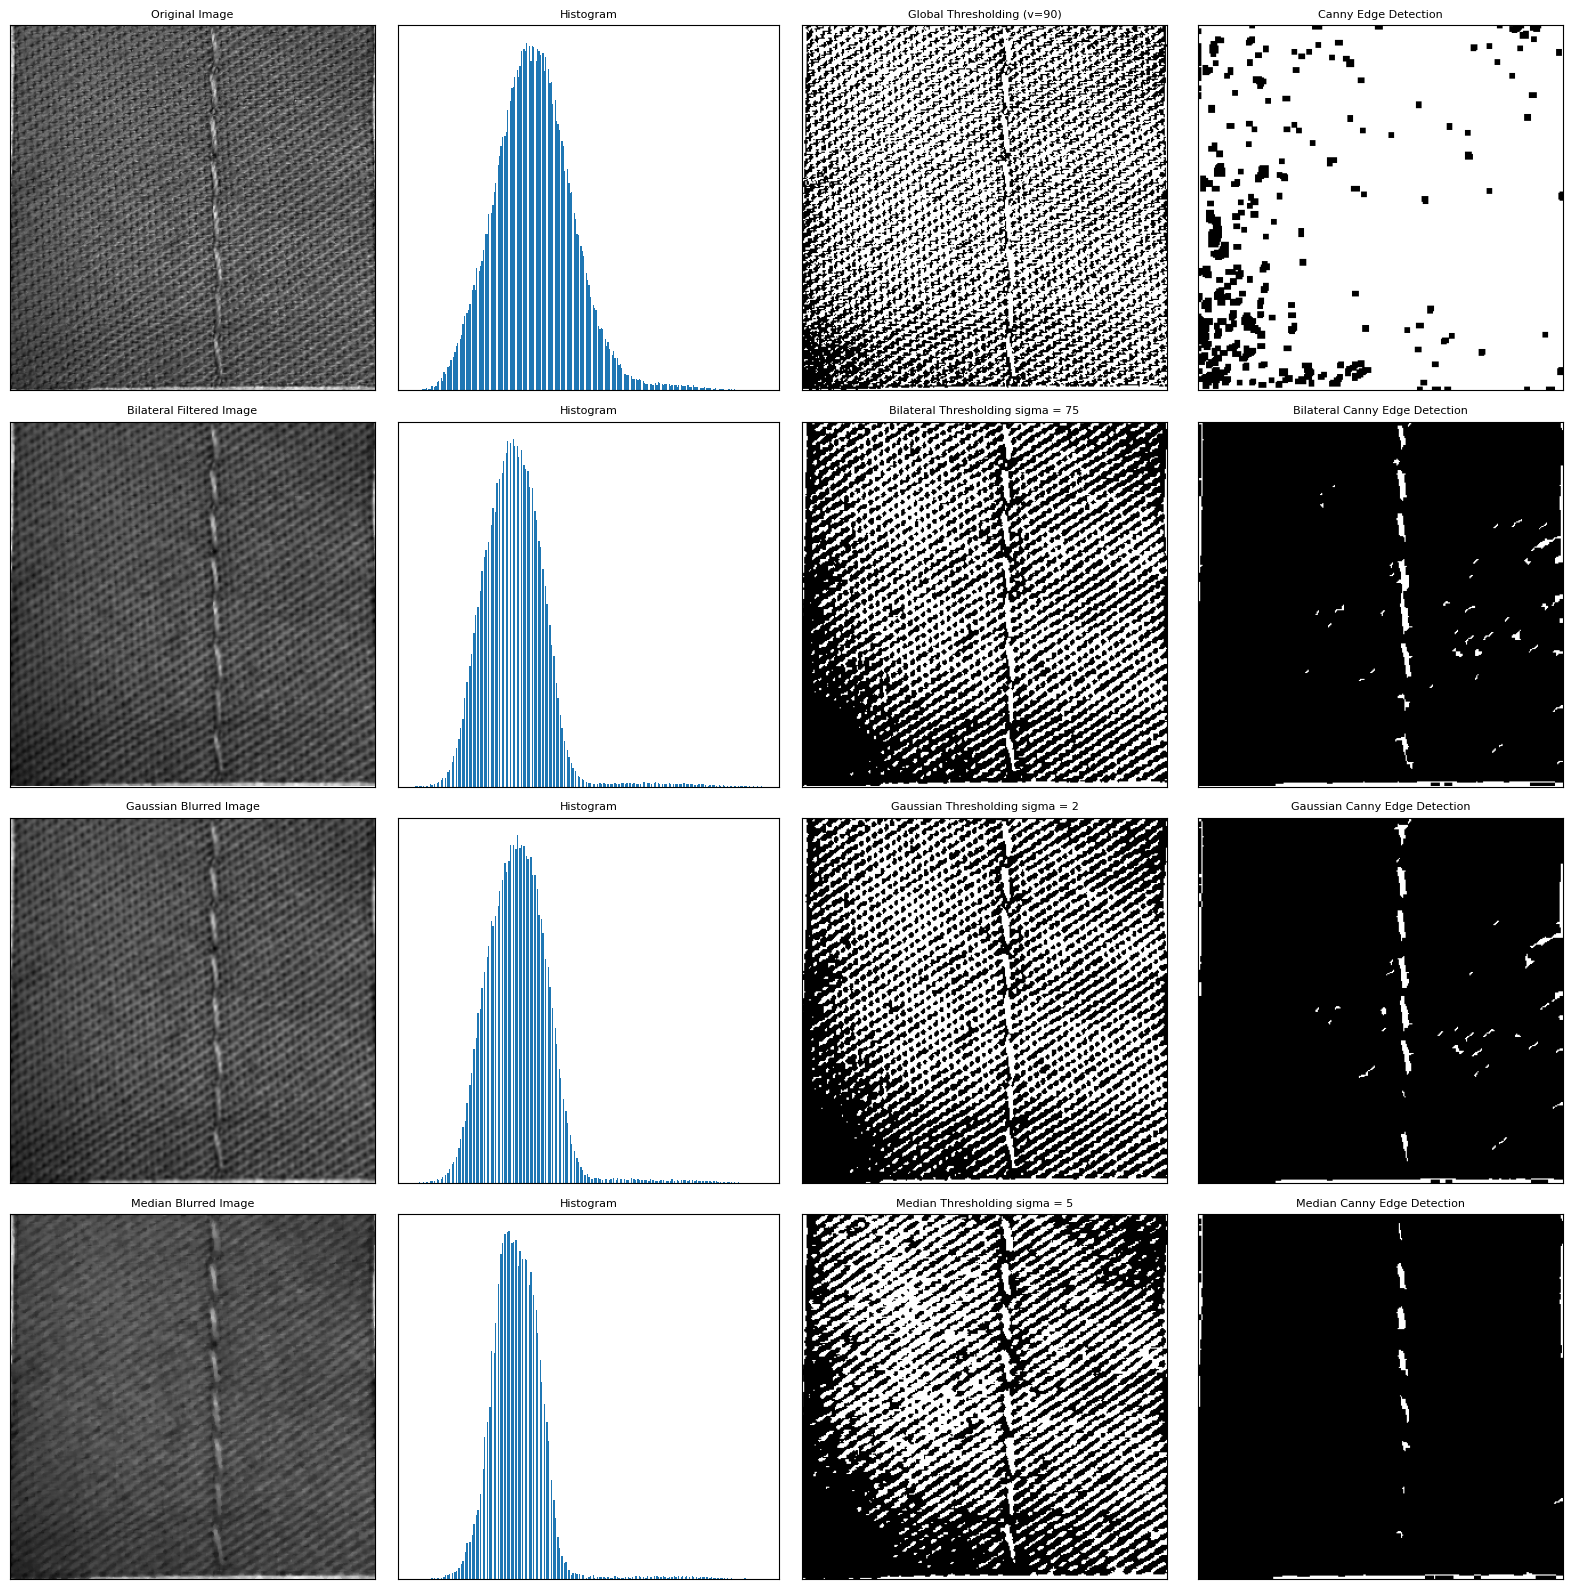

In [489]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Apply the filters
bilateral_filtered = cv2.bilateralFilter(image, 5, 75, 75) # sigmaColor = 75, sigmaSpace = 75
gaussian_blurred = cv2.GaussianBlur(image, (5,5), 0) # sigmaX = 0
median_blurred = cv2.medianBlur(image, 5) # ksize = 5

# Apply thresholding
_, thresholded = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)
_, bilateral_thresholded = cv2.threshold(bilateral_filtered, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, gaussian_thresholded = cv2.threshold(gaussian_blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, median_thresholded = cv2.threshold(median_blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply Canny edge detection
canny = cv2.Canny(image, 120, 200)
bilateral_canny = cv2.Canny(bilateral_filtered, 120, 200)
gaussian_canny = cv2.Canny(gaussian_blurred, 120, 200)
median_canny = cv2.Canny(median_blurred, 120, 200)

# Apply the dilation operation
kernel = np.ones((5,5), np.uint8)
canny = cv2.dilate(canny, kernel, iterations=1)
bilateral_canny = cv2.dilate(bilateral_canny, kernel, iterations=1)
gaussian_canny = cv2.dilate(gaussian_canny, kernel, iterations=1)
median_canny = cv2.dilate(median_canny, kernel, iterations=1)

# Apply the erosion operation
canny = cv2.erode(canny, kernel, iterations=1)
bilateral_canny = cv2.erode(bilateral_canny, kernel, iterations=1)
gaussian_canny = cv2.erode(gaussian_canny, kernel, iterations=1)
median_canny = cv2.erode(median_canny, kernel, iterations=1)

# Plot the images, their histograms, and Canny edge detection results
images = [image, 0, thresholded, canny,
          bilateral_filtered, 0, bilateral_thresholded, bilateral_canny,
          gaussian_blurred, 0, gaussian_thresholded, gaussian_canny,
          median_blurred, 0, median_thresholded, median_canny]

titles = ['Original Image','Histogram','Global Thresholding (v=90)','Canny Edge Detection',
          'Bilateral Filtered Image','Histogram',"Bilateral Thresholding sigmaColor & sigmaSpace = 75",'Bilateral Canny Edge Detection',
          'Gaussian Blurred Image','Histogram',"Gaussian Thresholding sigma = 0",'Gaussian Canny Edge Detection',
          'Median Blurred Image','Histogram',"Median Thresholding ksize = 5",'Median Canny Edge Detection']

plt.figure(figsize=(16, 16))

for i in range(4):
    plt.subplot(4,4,i*4+1),plt.imshow(images[i*4],'gray')
    plt.title(titles[i*4], fontsize=8), plt.xticks([]), plt.yticks([])
    plt.subplot(4,4,i*4+2),plt.hist(images[i*4].ravel(),256)
    plt.title(titles[i*4+1], fontsize=8), plt.xticks([]), plt.yticks([])
    plt.subplot(4,4,i*4+3),plt.imshow(images[i*4+2],'gray')
    plt.title(titles[i*4+2], fontsize=8), plt.xticks([]), plt.yticks([])
    plt.subplot(4,4,i*4+4),plt.imshow(images[i*4+3],'gray')
    plt.title(titles[i*4+3], fontsize=8), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()